# TITANIC SURVIVAL PREDICTION

dependencies in Python are third-party libraries and frameworks

In [1003]:
#Import the dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

"NumPy is a Python library used for working with arrays."
"Pandas is a powerful and versatile library that simplifies tasks of data manipulation in Python"  
"Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python"
"pyplot function makes some changes to a figure: e.g.,creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc."
"Seaborn is an amazing visualization library for statistical graphics plotting in Python. It provides beautiful default styles and color palettes to make statistical plots more attractive."
"Sklearn is a Python library that is widely used for various machine learning tasks"


In [1004]:
sns.set_style('whitegrid')

Data collection and processing


In [1005]:
# Load the data 
df = pd.read_csv('Titanic-Dataset.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [1006]:
#show first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1007]:
df.shape #(rows,columns)

(891, 12)

896 rows and 12 columns

In [1008]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1009]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

in age we have 177 null values and in cabin we have 687 null values

HANDLING THE MISSING VALUES

In [1010]:
#drop the cabin column from dataset since the missing values are alot,axis=1 represents column
df=df.drop(columns='Cabin',axis=1)

In [1011]:
#fill the missing age values using mean of age column
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [1012]:
#fill the embarked column using mode of embarked column
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [1013]:
print(df['Embarked'].mode()[0])

S


In [1014]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [1015]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

DATA ANALYSIS

In [1016]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [1017]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [1018]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [1019]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [1020]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [1021]:
df.describe()
#statistical description

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


DATA VISUALIZATION

In [1022]:
sns.set()

C:\Users\prateik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

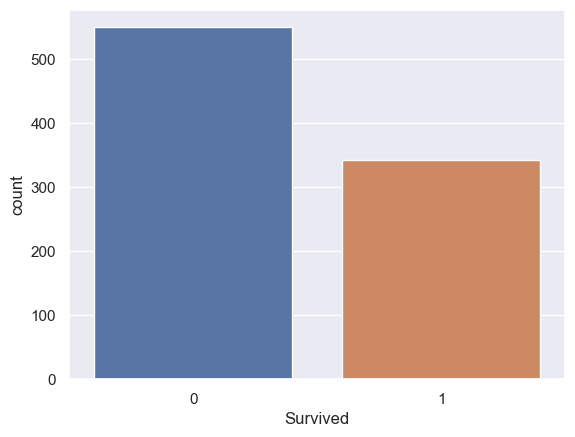

In [1023]:
#countplot
sns.countplot('Survived',data=df)

0 = Blue = Didn't Survived |||
1 = Brown = Survive

C:\Users\prateik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

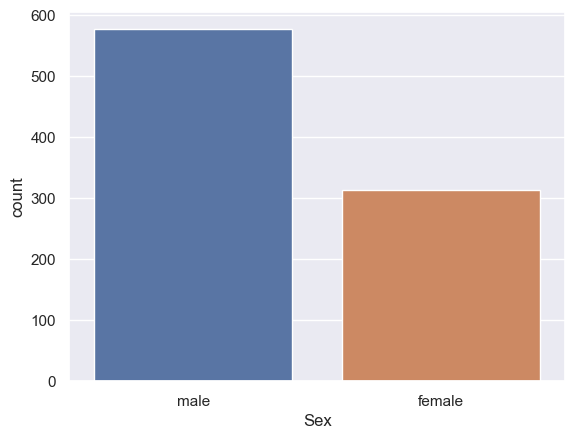

In [1024]:
sns.countplot('Sex',data=df)

C:\Users\prateik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

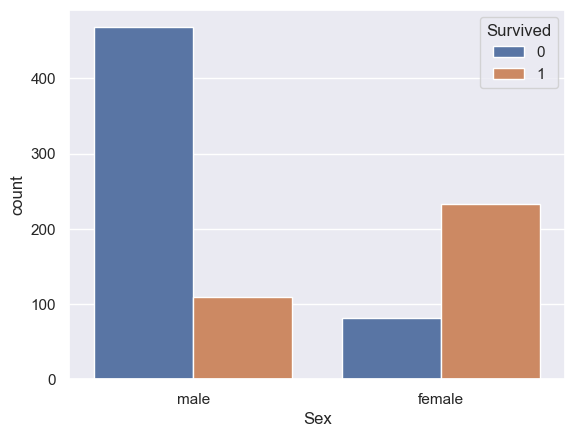

In [1025]:
sns.countplot('Sex', hue='Survived' ,data=df)

C:\Users\prateik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

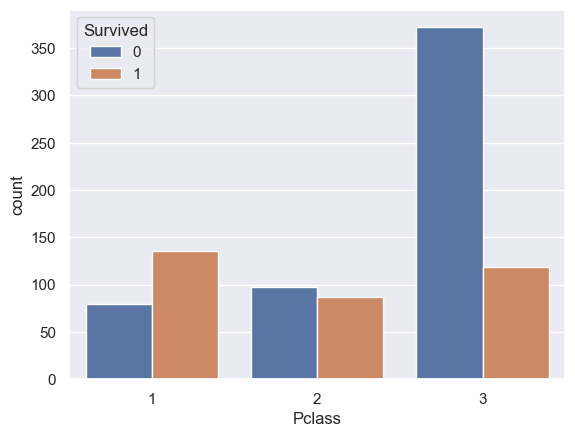

In [1026]:
sns.countplot('Pclass', hue='Survived' ,data=df)

C:\Users\prateik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

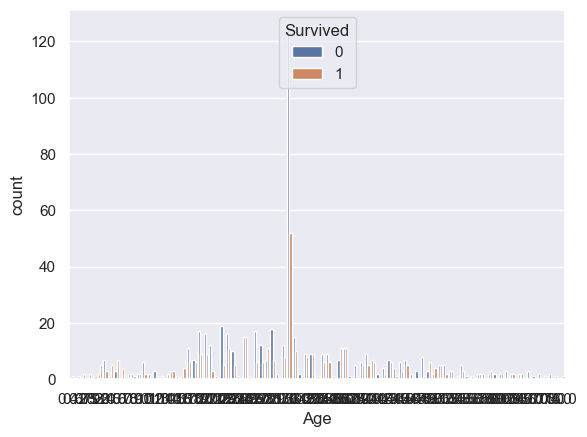

In [1027]:
sns.countplot('Age', hue='Survived' ,data=df)

C:\Users\prateik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

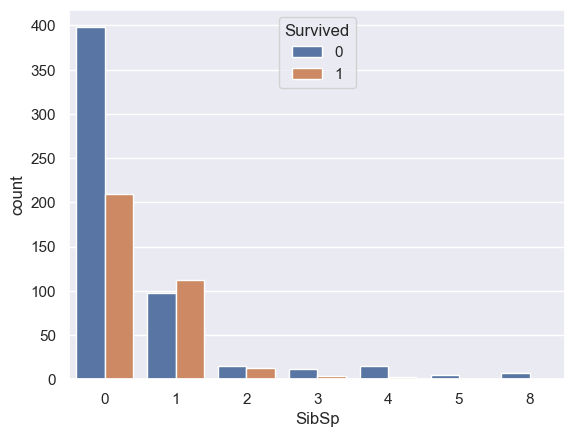

In [1028]:
sns.countplot('SibSp', hue='Survived' ,data=df)

Converting the data in numerical for

C:\Users\prateik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

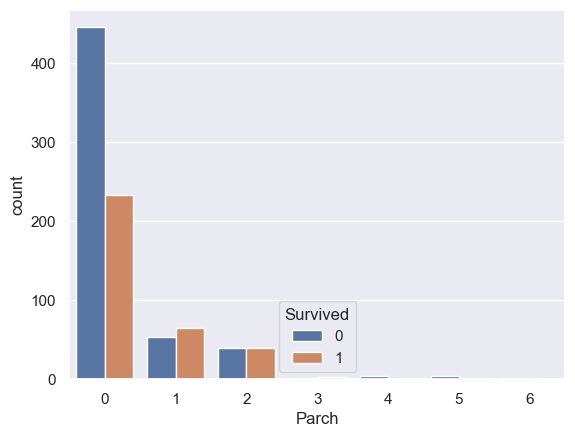

In [1029]:
sns.countplot('Parch', hue='Survived' ,data=df)

C:\Users\prateik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare', ylabel='count'>

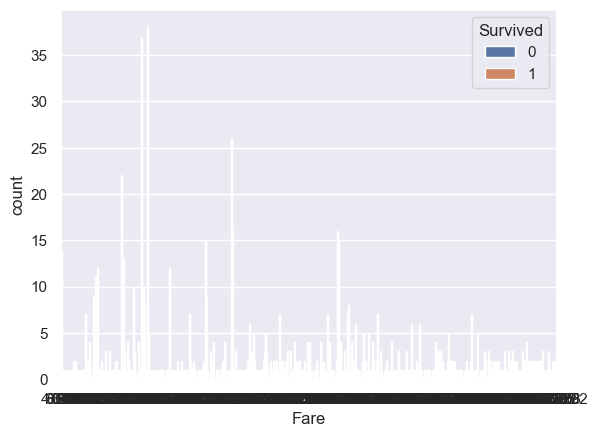

In [1030]:
sns.countplot('Fare', hue='Survived' ,data=df)

In [1031]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [1032]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [1033]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked': {'S':0,'C':1,'Q':2}}, inplace=True)

In [1034]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Clean the dataset 
Remove unnessary columns and the Survived column
add survived column in another dataframe

In [1037]:
x=df.drop(columns=['PassengerId','Name','Ticket','Survived','Embarked','SibSp','Parch','Fare'],axis=1)

In [1038]:
y=df['Survived']

In [1039]:
print(x)

     Pclass  Sex        Age
0         3    0  22.000000
1         1    1  38.000000
2         3    1  26.000000
3         1    1  35.000000
4         3    0  35.000000
..      ...  ...        ...
886       2    0  27.000000
887       1    1  19.000000
888       3    1  29.699118
889       1    0  26.000000
890       3    0  32.000000

[891 rows x 3 columns]


In [1040]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


TRAINING

Split the dataset for training and testing

In [1041]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=4 )

In [1042]:
print(x.shape,x_train.shape,y_train.shape)

(891, 3) (712, 3) (712,)


In [1043]:
print(y.shape,y_train.shape,y_test.shape)

(891,) (712,) (179,)


In [1044]:
len(x_train)

712

In [1045]:
len(x_test)

179

In [1046]:
len(y_train)

712

In [1047]:
len(y_test)

179

LOGISTIC REGRESSION

In [1048]:
model = LogisticRegression()

In [1049]:
model.fit(x_train,y_train)

LogisticRegression()

 Accuracy

In [1050]:
x_train_prediction = model.predict(x_train)

In [1051]:
print(x_train_prediction)

[0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 1 1 0 1 1 1 1 

In [1052]:
accuracy_of_trained_data = accuracy_score(y_train,x_train_prediction)
#accuracy of training data

In [1053]:
print(accuracy_of_trained_data)

0.7949438202247191


In [1054]:
x_test_prediction=model.predict(x_test)

In [1055]:
print(x_test_prediction)

[0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0]


In [1056]:
accuracy_of_test_data=accuracy_score(y_test,x_test_prediction)

In [1057]:
print(accuracy_of_test_data)

0.8212290502793296
